In [57]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import math
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
from IPython.display import HTML

In [58]:
def slope(time1, time2, time3):
    """
    returns the slope of the mean response times for 3, 6, and 12 items
    """
    X = [3,6,12]
    y = [time1, time2, time3]
    X = sm.add_constant(X) ## adds intercept to regression model
    
    model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
    predictions = model.predict(X)

    return model.params[1]

In [59]:
# from http://blog.nextgenetics.net/?a=2014-m09

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

### TO DO

- *** Add demographic data
- Mean by block first? > subject > condition
- Add z-scores to outlier output?
- More user friendly readout of important numbers
- Add explanations of calculations

In [60]:
# import data
long_raw = pd.read_csv('Long Line.csv',
                       names = ["SubjectNumber", "Block", "Trial", "Time", 'Key', 'Exp', 'Error', 'Condition'])
short_raw = pd.read_csv('Short Line.csv',
                        names = ["SubjectNumber", "Block", "Trial", "Time", 'Key', 'Exp', 'Error', 'Condition'])

In [61]:
# set error exclusion threshold (exclude participants with greater error rates)
excl_crit = 0.1

# list participants with error rates above threshold
long_raw_means = long_raw.groupby(by = ['SubjectNumber']).mean()
short_raw_means = short_raw.groupby(by = ['SubjectNumber']).mean()
long_errors = long_raw_means[long_raw_means['Error'] < (1 - excl_crit)]
short_errors = short_raw_means[short_raw_means['Error'] < (1 - excl_crit)]
exclude_long = long_errors.index.tolist()
exclude_short = short_errors.index.tolist()
exclude = exclude_long + exclude_short

## Participants with error rates above threshold
(Excluded from further analysis)

### Long line

In [87]:
if exclude_long == []:
    print('None')
else:
    print(exclude_long)

None


### Short line

In [97]:
if exclude_short == []:
    print('None')
else:
    print(exclude_short)

None


### Threshold

In [64]:
print(str(excl_crit * 100) + '%')

10.0%


In [65]:
# read raw data
long_data = pd.read_csv('VSa49_long.csv')
short_data = pd.read_csv('VSa49_short.csv')

# exclude error trials
long_data = long_data[long_data['Error'] == 1]
short_data = short_data[short_data['Error'] == 1]

# exclude participants with error rate above exclusion threshold
long_data = long_data[~long_data['SubjectNumber'].isin(exclude)]
short_data = short_data[~short_data['SubjectNumber'].isin(exclude)]

# log transform Time
long_data['Time'] = long_data['Time'].apply(math.log10)
short_data['Time'] = short_data['Time'].apply(math.log10)

# create a table of mean response time in each condition (target type x item number)
# PRESENT trials
long3 = long_data[(long_data['Condition'] == 1) & (long_data['Exp'] == 1)].groupby(by = ['SubjectNumber']).mean()
long6 = long_data[(long_data['Condition'] == 2) & (long_data['Exp'] == 1)].groupby(by = ['SubjectNumber']).mean()
long12 = long_data[(long_data['Condition'] == 3) & (long_data['Exp'] == 1)].groupby(by = ['SubjectNumber']).mean()
short3 = short_data[(short_data['Condition'] == 1) & (short_data['Exp'] == 1)].groupby(by = ['SubjectNumber']).mean()
short6 = short_data[(short_data['Condition'] == 2) & (short_data['Exp'] == 1)].groupby(by = ['SubjectNumber']).mean()
short12 = short_data[(short_data['Condition'] == 3) & (short_data['Exp'] == 1)].groupby(by = ['SubjectNumber']).mean()

# ABSENT trials
a_long3 = long_data[(long_data['Condition'] == 1) & (long_data['Exp'] == 0)].groupby(by = ['SubjectNumber']).mean()
a_long6 = long_data[(long_data['Condition'] == 2) & (long_data['Exp'] == 0)].groupby(by = ['SubjectNumber']).mean()
a_long12 = long_data[(long_data['Condition'] == 3) & (long_data['Exp'] == 0)].groupby(by = ['SubjectNumber']).mean()
a_short3 = short_data[(short_data['Condition'] == 1) & (short_data['Exp'] == 0)].groupby(by = ['SubjectNumber']).mean()
a_short6 = short_data[(short_data['Condition'] == 2) & (short_data['Exp'] == 0)].groupby(by = ['SubjectNumber']).mean()
a_short12 = short_data[(short_data['Condition'] == 3) & (short_data['Exp'] == 0)].groupby(by = ['SubjectNumber']).mean()

# assemble lists into dataframe
present_data_log = pd.DataFrame({'long3':long3['Time'], 'long6':long6['Time'], 'long12':long12['Time'],
                             'short3':short3['Time'], 'short6':short6['Time'], 'short12':short12['Time']})

absent_data_log = pd.DataFrame({'long3':a_long3['Time'], 'long6':a_long6['Time'], 'long12':a_long12['Time'],
                             'short3':a_short3['Time'], 'short6':a_short6['Time'], 'short12':a_short12['Time']})

# backtransform log times
present_data = 10**present_data_log
absent_data = 10**absent_data_log

# add columns for slopes and slope ratio
present_data['long_slope'] = slope(present_data['long3'], present_data['long6'], present_data['long12'])
present_data['short_slope'] = slope(present_data['short3'], present_data['short6'], present_data['short12'])
present_data['slope_ratio'] = present_data['short_slope']/present_data['long_slope']
present_data['slope_ratio_sqrt'] = np.sqrt(present_data['slope_ratio'])

absent_data['long_slope'] = slope(absent_data['long3'], absent_data['long6'], absent_data['long12'])
absent_data['short_slope'] = slope(absent_data['short3'], absent_data['short6'], absent_data['short12'])
absent_data['slope_ratio'] = absent_data['short_slope']/absent_data['long_slope']
absent_data['slope_ratio_sqrt'] = np.sqrt(absent_data['slope_ratio'])

# add baselines
present_data['long_base'] = present_data['long12'] - present_data['long_slope'] * 11
present_data['short_base'] = present_data['short12'] - present_data['short_slope'] * 11
absent_data['long_base'] = present_data['long12'] - present_data['long_slope'] * 11
absent_data['short_base'] = present_data['short12'] - present_data['short_slope'] * 11

## Present data

In [66]:
present_data.round(3)

,long3,long6,long12,short3,short6,short12,long_slope,short_slope,slope_ratio,slope_ratio_sqrt,long_base,short_base
SubjectNumber,,,,,,,,,,,,
1,650.562,754.292,916.118,700.521,799.345,936.742,29.144,25.769,0.884,0.940,595.533,653.288
2,999.620,1291.431,1605.373,1470.444,1798.257,1952.878,65.166,49.627,0.762,0.873,888.552,1406.975
3,1213.001,1104.165,1408.875,1421.453,1430.915,1881.170,25.910,54.503,2.104,1.450,1123.869,1281.638
4,641.633,751.847,808.530,768.773,976.698,1126.792,17.245,37.671,2.184,1.478,618.840,712.414
5,1248.817,1362.250,1654.969,1188.585,1314.871,1814.766,45.651,71.539,1.567,1.252,1152.811,1027.842
6,1155.517,1221.258,1512.602,1089.716,1361.840,1809.806,40.945,79.246,1.935,1.391,1062.209,938.101
7,1180.196,1190.860,1529.759,1102.161,1456.993,1822.378,41.361,77.292,1.869,1.367,1074.791,972.169
8,1018.074,1178.669,1502.999,1591.207,1842.446,2211.382,53.906,67.848,1.259,1.122,910.038,1465.049
9,2254.977,2340.387,2639.427,1344.391,1493.657,1673.437,43.734,35.618,0.814,0.902,2158.349,1281.637


#### Summary statistics

In [67]:
present_desc = present_data.describe()
present_desc.round(3)

,long3,long6,long12,short3,short6,short12,long_slope,short_slope,slope_ratio,slope_ratio_sqrt,long_base,short_base
count,16.000,16.000,16.000,16.000,16.000,16.000,16.000,16.000,16.000,16.000,16.000,16.000
mean,1078.390,1173.046,1429.008,1077.014,1271.190,1579.046,39.487,55.142,1.493,1.202,994.656,972.479
std,390.125,390.853,440.745,280.072,303.583,352.580,11.995,16.854,0.528,0.226,376.792,272.441
min,641.633,729.736,808.530,700.499,799.345,936.742,17.245,25.769,0.762,0.873,595.533,591.525
25%,830.294,915.430,1125.552,848.261,1013.505,1320.422,31.850,42.500,0.879,0.937,761.202,742.190
50%,1026.428,1141.417,1466.317,1056.806,1284.680,1678.836,39.323,53.437,1.582,1.258,915.435,947.688
75%,1214.562,1309.136,1575.413,1273.012,1437.434,1816.669,45.802,68.771,1.885,1.373,1130.578,1157.164
max,2254.977,2340.387,2639.427,1591.207,1842.446,2211.382,65.166,82.063,2.237,1.496,2158.349,1465.049


#### t-test

In [68]:
stats.ttest_rel(present_data['short_slope'],present_data['long_slope'])

Ttest_relResult(statistic=3.3268286835113656, pvalue=0.004598801806368277)

## Absent data

In [69]:
absent_data.round(3)

,long3,long6,long12,short3,short6,short12,long_slope,short_slope,slope_ratio,slope_ratio_sqrt,long_base,short_base
SubjectNumber,,,,,,,,,,,,
1,676.754,916.527,993.957,723.095,982.367,1362.890,32.053,69.993,2.184,1.478,595.533,653.288
2,1498.600,2331.555,2503.662,1971.100,2906.501,3638.406,99.818,176.217,1.765,1.329,888.552,1406.975
3,1211.747,1258.322,1684.818,1686.090,1985.154,3100.886,55.209,161.308,2.922,1.709,1123.869,1281.638
4,712.002,915.941,1127.935,939.368,1190.586,1794.602,44.660,95.832,2.146,1.465,618.840,712.414
5,1315.236,1672.175,2077.996,1200.244,1549.167,2195.093,82.306,110.127,1.338,1.157,1152.811,1027.842
6,1235.557,2127.771,4149.886,1267.204,2107.787,3091.420,325.701,197.155,0.605,0.778,1062.209,938.101
7,1170.060,1745.973,1931.381,1251.611,1806.276,2490.780,76.921,134.314,1.746,1.321,1074.791,972.169
8,1746.733,2271.501,3179.844,1619.399,2642.596,4046.668,158.114,264.599,1.673,1.294,910.038,1465.049
9,2646.758,3356.018,4535.674,1976.428,2162.809,2767.363,207.984,89.721,0.431,0.657,2158.349,1281.637


#### Summary statistics

In [70]:
absent_desc = absent_data.describe()
absent_desc.round(3)

,long3,long6,long12,short3,short6,short12,long_slope,short_slope,slope_ratio,slope_ratio_sqrt,long_base,short_base
count,16.000,16.000,16.000,16.000,16.000,16.000,16.000,16.000,16.000,16.000,16.000,16.000
mean,1266.650,1766.042,2372.244,1314.242,1808.180,2615.661,119.728,143.170,1.469,1.182,994.656,972.479
std,466.967,643.943,1009.480,369.147,544.629,782.323,76.128,57.755,0.648,0.276,376.792,272.441
min,676.754,915.941,993.957,723.095,982.367,1362.890,32.053,68.131,0.431,0.657,595.533,591.525
25%,1052.246,1274.555,1702.138,1091.907,1398.740,2147.384,67.120,95.448,1.088,1.043,761.202,742.190
50%,1223.652,1775.656,2229.401,1259.408,1818.275,2588.156,92.102,131.787,1.413,1.188,915.435,947.688
75%,1388.609,2165.505,2928.570,1585.345,2121.542,3162.895,160.315,181.452,1.797,1.340,1130.578,1157.164
max,2646.758,3356.018,4535.674,1976.428,2906.501,4046.668,325.701,264.599,2.922,1.709,2158.349,1465.049


#### t-test

In [71]:
stats.ttest_rel(absent_data['short_slope'],absent_data['long_slope'])

Ttest_relResult(statistic=1.391682309272163, pvalue=0.1843131498080283)

## Outlier tests

In [72]:
# list participants with a slope/ratio over 2 sd from the mean
high_long = present_data[present_data['long_slope'] > 
                         present_desc['long_slope']['mean'] + present_desc['long_slope']['std'] * 2]
high_short = present_data[present_data['short_slope'] > 
                          present_desc['short_slope']['mean'] + present_desc['short_slope']['std'] * 2]
high_ratio = present_data[present_data['slope_ratio_sqrt'] > 
                          present_desc['slope_ratio_sqrt']['mean'] + present_desc['slope_ratio_sqrt']['std'] * 2]

low_long = present_data[present_data['long_slope'] < 
                         present_desc['long_slope']['mean'] - present_desc['long_slope']['std'] * 2]
low_short = present_data[present_data['short_slope'] < 
                          present_desc['short_slope']['mean'] - present_desc['short_slope']['std'] * 2]
low_ratio = present_data[present_data['slope_ratio_sqrt'] < 
                          present_desc['slope_ratio_sqrt']['mean'] - present_desc['slope_ratio_sqrt']['std'] * 2]

#### High long slope

In [95]:
if high_long.index.tolist() == []:
    print('None')
else:
    print(high_long.index.tolist())

[2]


#### Low long slope

In [96]:
if low_long.index.tolist() == []:
    print('None')
else:
    print(low_long.index.tolist())

None


#### High short slope

In [104]:
if high_short.index.tolist() == []:
    print('None')
else:
    print(high_short.index.tolist())

None


#### Low short slope

In [100]:
if low_short.index.tolist() == []:
    print('None')
else:
    print(low_short.index.tolist())

None


#### High slope ratio

In [103]:
if high_ratio.index.tolist() == []:
    print('None')
else:
    print(high_ratio.index.tolist())

None


#### Low slope ratio

In [102]:
if low_ratio.index.tolist() == []:
    print('None')
else:
    print(low_ratio.index.tolist())

None


##  Graphs

In [79]:
grouped = long_data.groupby(['SubjectNumber', 'Condition'])
grouped.mean()

Block      Trial      Time       Key       Exp  \
SubjectNumber Condition                                                      
1             1          3.000000  14.740000  2.821860  0.500000  0.500000   
              2          2.959184  14.632653  2.920705  0.489796  0.489796   
              3          3.000000  17.224490  2.980021  0.489796  0.489796   
2             1          3.000000  17.120000  3.087760  0.500000  0.500000   
              2          3.000000  15.620000  3.239359  0.500000  0.500000   
              3          3.021739  13.978261  3.306272  0.478261  0.478261   
3             1          3.000000  14.960000  3.083637  0.500000  0.500000   
              2          3.000000  14.180000  3.071413  0.500000  0.500000   
              3          3.000000  17.360000  3.187713  0.500000  0.500000   
4             1          3.000000  16.220000  2.829884  0.500000  0.500000   
              2          2.959184  14.714286  2.919873  0.489796  0.489796   
              3          3.000000  15.127660  2.984605  0.468085  0.468085   
5             1          3.000000  15.820000  3.107751  0.500000  0.500000   
              2          3.000000  13.600000  3.178769  0.500000  0.500000   
              3          3.020408  17.265306  3.269226  0.489796  0.489796   
6             1          3.020408  16.204082  3.077616  0.489796  0.489796   
              2          3.000000  16.240000  3.207366  0.500000  0.500000   
              3          2.979167  14.020833  3.408012  0.479167  0.479167   
7             1          3.020408  15.979592  3.070043  0.489796  0.489796   
              2          2.959184  15.530612  3.160645  0.489796  0.489796   
              3          3.062500  15.250000  3.237355  0.479167  0.479167   
8             1          3.000000  14.500000  3.125003  0.500000  0.500000   
              2          3.000000  16.083333  3.219788  0.479167  0.479167   
              3          2.979167  15.750000  3.346462  0.479167  0.479167   
9             1          3.000000  15.380000  3.387928  0.500000  0.500000   
              2          3.000000  15.300000  3.447556  0.500000  0.500000   
              3          3.085106  16.063830  3.541577  0.489362  0.489362   
10            1          2.959184  14.408163  3.042852  0.489796  0.489796   
              2          3.040816  16.000000  3.145845  0.489796  0.489796   
              3          2.957447  16.063830  3.302148  0.468085  0.468085   
11            1          3.000000  16.440000  3.111290  0.500000  0.500000   
              2          2.959184  15.632653  3.234559  0.510204  0.510204   
              3          2.958333  14.791667  3.336625  0.479167  0.479167   
12            1          3.000000  16.160000  2.979515  0.500000  0.500000   
              2          3.000000  13.640000  3.057612  0.500000  0.500000   
              3          2.959184  16.816327  3.148000  0.489796  0.489796   
13            1          3.020833  15.833333  3.151343  0.479167  0.479167   
              2          3.000000  15.720000  3.258723  0.500000  0.500000   
              3          3.021277  15.340426  3.355366  0.468085  0.468085   
14            1          3.000000  14.200000  3.037484  0.500000  0.500000   
              2          3.000000  15.460000  3.144387  0.500000  0.500000   
              3          3.063830  17.042553  3.273044  0.468085  0.468085   
15            1          3.000000  18.640000  2.853702  0.500000  0.500000   
              2          3.000000  12.600000  2.932026  0.500000  0.500000   
              3          3.021277  15.446809  3.048224  0.489362  0.489362   
16            1          3.000000  15.340000  2.942750  0.500000  0.500000   
              2          3.000000  15.920000  3.028879  0.500000  0.500000   
              3          3.086957  15.086957  3.147051  0.456522  0.456522   

                         Error  
SubjectNumber Condition         
1             1            1.0  
              2            1

([<matplotlib.axis.XTick at 0x1852a3f3198>,
 <a list of 4 Text xticklabel objects>)

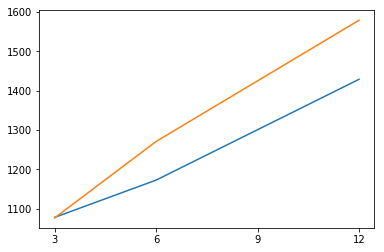

In [80]:
# plot a line for long and short targets over item numbers in present trials
plt.plot([3,6,12], [present_desc.iat[1,0],present_desc.iat[1,1],present_desc.iat[1,2]])
plt.plot([3,6,12], [present_desc.iat[1,3],present_desc.iat[1,4],present_desc.iat[1,5]])
plt.xticks([3,6,9,12])

([<matplotlib.axis.XTick at 0x1852a430da0>,
 <a list of 4 Text xticklabel objects>)

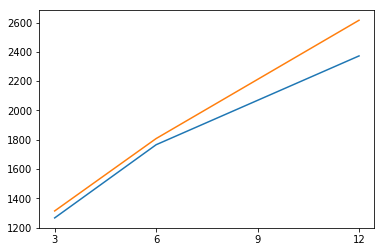

In [81]:
# plot a line for long and short targets over item numbers in absent trials
plt.plot([3,6,12], [absent_desc.iat[1,0],absent_desc.iat[1,1],absent_desc.iat[1,2]])
plt.plot([3,6,12], [absent_desc.iat[1,3],absent_desc.iat[1,4],absent_desc.iat[1,5]])
plt.xticks([3,6,9,12])

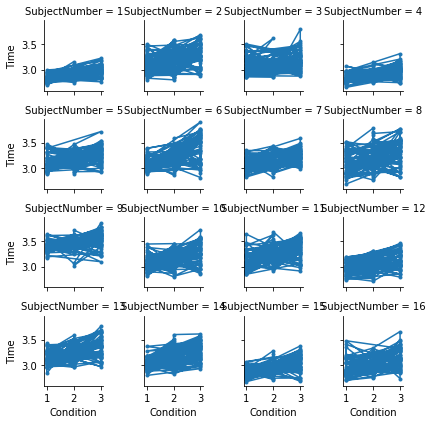

In [82]:
g = sns.FacetGrid(long_data, col="SubjectNumber", col_wrap=4, height=1.5)
g = g.map(plt.plot, "Condition", "Time", marker=".")

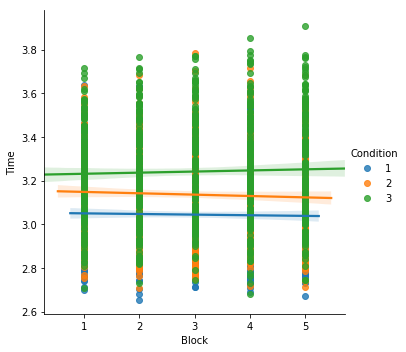

In [83]:
sns.lmplot("Block", "Time", data=long_data, hue="Condition", 
           fit_reg=True)

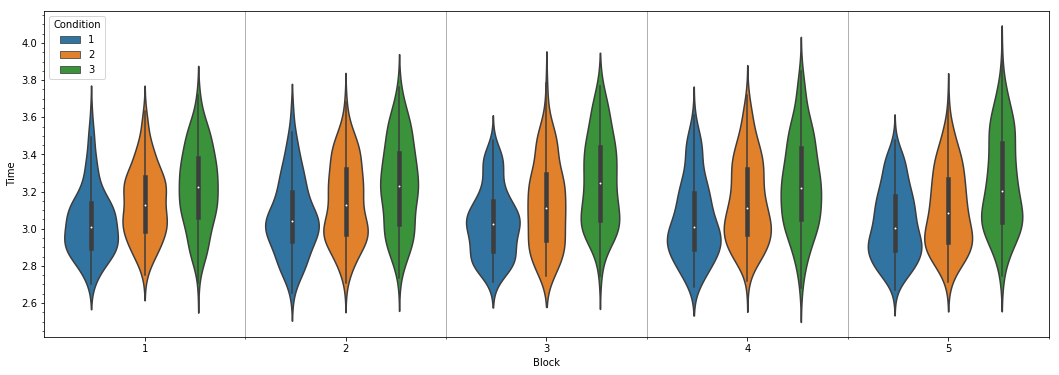

In [84]:
# From https://towardsdatascience.com/a-guide-to-pandas-and-matplotlib-for-data-exploration-56fad95f951c

from matplotlib.ticker import AutoMinorLocator

fig = plt.figure(figsize=(18,6))

ax1 = sns.violinplot('Block', "Time", 
                     data=long_data, hue='Condition')

ax1.minorticks_on()
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.grid(which='minor', axis='x', linewidth=1)

In [85]:
# misc notes

# X = df["RM"] ## X usually means our input variables (or independent variables)
# y = target["MEDV"] ## Y usually means our output/dependent variable
# X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# # Note the difference in argument order
# model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
# predictions = model.predict(X)

# # Print out the statistics
# model.summary()

### Formulas etc.

Visual search basics?

Target:

Distractor:

Set size: 

Symmetry?:

Slope: slope of the regression line of mean time of trials of each set size over the set sizes. Estimates the increase in response time per addition of one item to the display.

Slope ratio: the ratio of the slope of short target trials over the slope for long target trials. (short slope) / (long slope)

Baseline: the estimated time it would take the participant to respond in a trial with set size of one. Calculated here for each the long target and short target trials as (mean response time for set size of 12) - (slope) x 11